Import Necessary Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re 
import nltk
import string 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob

Scrape the data through function

In [2]:
def url_script(url): 
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36 Edg/101.0.1210.39'}
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')
    ptext = [p.text for p in soup.find_all(class_= 'grid-ten')]
    return ptext

data_text = url_script('https://theconversation.com/ukraine-international-pressure-needs-to-be-on-moscow-not-kyiv-184485')

Remove a trailing newline character

In [3]:
txt_split = data_text[0].split('\n')
text = [x for x in txt_split if x != '']
text

['Having crossed the 100-day mark, the war in Ukraine is having an ever more obvious, and negative, impact on a wide range of issues. From a global food crisis that could last for years to serious problems with the cost of living and the prospect of a world recession, the lack of an end in sight in the war has western leaders worried and uncertain how best to respond. There are arguments for delaying Russian progress or even attempting to defeat it by strengthening Ukraine militarily, but equally for a quick negotiated settlement based on Ukrainian concessions.',
 'On the settlement front, there have been reports that western pressure has been building on Kyiv to make concessions to Russia to bring the war to an end. These have included former US secretary of state Henry Kissinger’s comments at the World Economic Forum in Davos in May and French president Emmanuel Macron’s warning that Russia must not be humiliated. ',
 '      Read more:',
 '      Ukraine war: rising food prices are no

Saving the data

In [4]:
df_scrape = pd.DataFrame()
df_scrape['raw_data'] = text
df_scrape.to_csv('scrape_data.csv', index=False)
df_scrape

,raw_data
0,"Having crossed the 100-day mark, the war in Uk..."
1,"On the settlement front, there have been repor..."
2,Read more:
3,Ukraine war: rising food prices are not ...
4,Such international pressure that exists on Ukr...
5,Ukrainian forces have pushed back against the ...
6,Reuters/Alamy
7,"Nonetheless, efforts to revive political negot..."
8,But the positions of Moscow and Kyiv remain as...
9,Entrenched positions


Data Cleaning

In [5]:
documents = []
stemmer = WordNetLemmatizer()
for i in range(0, len(text)):
    document = re.sub(r'^[a-zA-Z]\s+', ' ', text[i])
    document = document.lower()
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = [word for word in document if word not in stopwords.words('english')]
    document = ' '.join(document)
    documents.append(document)
    
documents

['crossed 100 day mark war ukraine ever obvious negative impact wide range issue global food crisis could last year serious problem cost living prospect world recession lack end sight war ha western leader worried uncertain best respond argument delaying russian progress even attempting defeat strengthening ukraine militarily equally quick negotiated settlement based ukrainian concession',
 'settlement front report western pressure ha building kyiv make concession russia bring war end included former u secretary state henry kissinger comment world economic forum davos may french president emmanuel macron warning russia must humiliated',
 'read',
 'ukraine war rising food price global economic fallout',
 'international pressure exists ukraine doe appear particularly effective however political track actual settlement remains obstructed humanitarian negotiation discussion unblocking ukrainian black sea port continue thanks turkish un mediation',
 'ukrainian force pushed back russian mili

Saving the Processed data in csv

In [6]:
df = pd.DataFrame()
df['Document'] = documents
df.drop([2,3,6,9,14,15,16], axis=0, inplace=True)
df.to_csv('clean_data.csv', index=False)

df


,Document
0,crossed 100 day mark war ukraine ever obvious ...
1,settlement front report western pressure ha bu...
4,international pressure exists ukraine doe appe...
5,ukrainian force pushed back russian military a...
7,nonetheless effort revive political negotiatio...
8,position moscow kyiv remain far apart march un...
10,change hardly imminent seeing ongoing battle d...
11,ukraine often stated pushing russian force bac...
12,fighting therefore remains intense costly side...
13,kyiv western ally agreement consolidates kreml...


Read the Cleaned scrap data

In [7]:
df_clean = pd.read_csv('clean_data.csv')
df_clean.head(20)

,Document
0,crossed 100 day mark war ukraine ever obvious ...
1,settlement front report western pressure ha bu...
2,international pressure exists ukraine doe appe...
3,ukrainian force pushed back russian military a...
4,nonetheless effort revive political negotiatio...
5,position moscow kyiv remain far apart march un...
6,change hardly imminent seeing ongoing battle d...
7,ukraine often stated pushing russian force bac...
8,fighting therefore remains intense costly side...
9,kyiv western ally agreement consolidates kreml...


Polarity & Subjectivity

In [8]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_clean['polarity'] = df_clean['Document'].apply(pol)
df_clean['subjectivity'] = df_clean['Document'].apply(sub)

df_clean

,Document,polarity,subjectivity
0,crossed 100 day mark war ukraine ever obvious ...,0.060000,0.283333
1,settlement front report western pressure ha bu...,0.050000,0.050000
2,international pressure exists ukraine doe appe...,0.105556,0.272222
3,ukrainian force pushed back russian military a...,-0.033333,0.033333
4,nonetheless effort revive political negotiatio...,-0.041667,0.208333
5,position moscow kyiv remain far apart march un...,-0.200000,0.750000
6,change hardly imminent seeing ongoing battle d...,-0.004167,0.472917
7,ukraine often stated pushing russian force bac...,0.190000,0.290000
8,fighting therefore remains intense costly side...,-0.010938,0.506250
9,kyiv western ally agreement consolidates kreml...,0.075758,0.264394


In [18]:
bin_pol = [-1, 0, 1]
df_clean['score'] = df_clean['Document'].apply(pol)
df_clean['pred'] = pd.cut(df_clean['score'], bins=bin_pol, labels=[
                          'Negative Sentiment', 'Positive Sentiment'])
df_clean = df_clean.drop('score', axis=1)

df_clean

,Document,polarity,subjectivity,pred,Length
0,crossed 100 day mark war ukraine ever obvious ...,0.060000,0.283333,Positive Sentiment,54
1,settlement front report western pressure ha bu...,0.050000,0.050000,Positive Sentiment,35
2,international pressure exists ukraine doe appe...,0.105556,0.272222,Positive Sentiment,28
3,ukrainian force pushed back russian military a...,-0.033333,0.033333,Negative Sentiment,9
4,nonetheless effort revive political negotiatio...,-0.041667,0.208333,Negative Sentiment,58
5,position moscow kyiv remain far apart march un...,-0.200000,0.750000,Negative Sentiment,15
6,change hardly imminent seeing ongoing battle d...,-0.004167,0.472917,Negative Sentiment,23
7,ukraine often stated pushing russian force bac...,0.190000,0.290000,Positive Sentiment,39
8,fighting therefore remains intense costly side...,-0.010938,0.506250,Negative Sentiment,47
9,kyiv western ally agreement consolidates kreml...,0.075758,0.264394,Positive Sentiment,46


Plotting


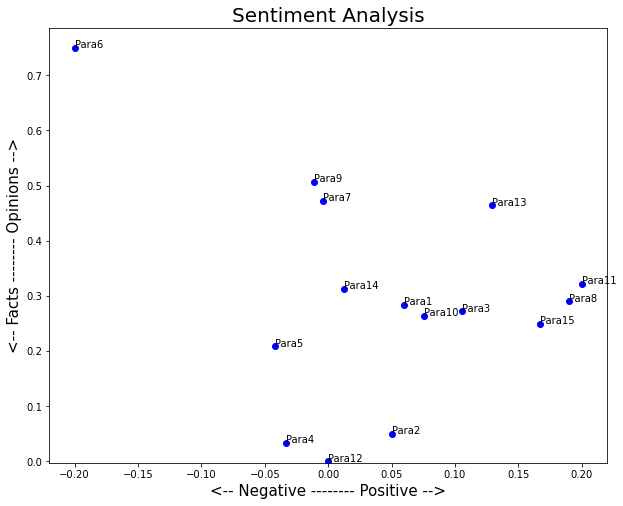

In [19]:
plt.rcParams['figure.figsize'] = [10, 8]

names = ['Para1', 'Para2', 'Para3', 'Para4', 'Para5', 'Para6', 'Para7', 'Para8', 'Para9', 'Para10', 'Para11', 'Para12', 'Para13', 'Para14', 'Para15']

for index, sen in enumerate(df_clean.index):
    x = df_clean.polarity.loc[sen]
    y = df_clean.subjectivity.loc[sen]
    plt.scatter(x, y, color='blue')
    plt.text(x, y, names[index], fontsize=10)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Vectorizing text document

In [20]:
tfidf = TfidfVectorizer(max_features=10, min_df=5, max_df=0.7, 
                        ngram_range=(1, 3), stop_words=stopwords.words('english'))
X = tfidf.fit_transform(df_clean['Document'])
X.toarray()

array([[0.42381727, 0.42381727, 0.        , 0.        , 0.3655085 ,
        0.45958258, 0.34106325, 0.42381727],
       [0.34075025, 0.34075025, 0.34075025, 0.63168238, 0.        ,
        0.36950566, 0.        , 0.34075025],
       [0.        , 0.        , 0.5951214 , 0.        , 0.        ,
        0.64534281, 0.47891875, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.7311331 ,
        0.        , 0.68223485, 0.        ],
       [0.        , 0.42710776, 0.        , 0.3958859 , 0.73669254,
        0.        , 0.34371124, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.7311331 ,
        0.        , 0.68223485, 0.        ],
       [0.        , 0.        , 0.        , 0.57451708, 0.53455105,
        0.        , 0.        , 0.61982683],
       [0.        , 0.86135098, 0.        , 0.        , 0.37142316,
        0.        , 0.346582

In [21]:
tfidf.get_feature_names_out()

array(['concession', 'ha', 'pressure', 'russia', 'russian', 'settlement',
       'ukrainian', 'western'], dtype=object)

In [22]:
fdist = FreqDist()
for x in str(df_clean['Document'][:]).split():
    fdist[x] += 1
    
fdist.most_common(10)


[('ukraine', 4),
 ('western', 4),
 ('pressure', 4),
 ('...', 3),
 ('war', 2),
 ('ukrainian', 2),
 ('force', 2),
 ('russian', 2),
 ('kyiv', 2),
 ('therefore', 2)]

Length of The Document


In [23]:
df_clean['Length'] = df_clean['Document'].apply(lambda x: len(x.split())) 

df_clean.head(20)


,Document,polarity,subjectivity,pred,Length
0,crossed 100 day mark war ukraine ever obvious ...,0.060000,0.283333,Positive Sentiment,54
1,settlement front report western pressure ha bu...,0.050000,0.050000,Positive Sentiment,35
2,international pressure exists ukraine doe appe...,0.105556,0.272222,Positive Sentiment,28
3,ukrainian force pushed back russian military a...,-0.033333,0.033333,Negative Sentiment,9
4,nonetheless effort revive political negotiatio...,-0.041667,0.208333,Negative Sentiment,58
5,position moscow kyiv remain far apart march un...,-0.200000,0.750000,Negative Sentiment,15
6,change hardly imminent seeing ongoing battle d...,-0.004167,0.472917,Negative Sentiment,23
7,ukraine often stated pushing russian force bac...,0.190000,0.290000,Positive Sentiment,39
8,fighting therefore remains intense costly side...,-0.010938,0.506250,Negative Sentiment,47
9,kyiv western ally agreement consolidates kreml...,0.075758,0.264394,Positive Sentiment,46


Saving the Data


In [24]:
df_clean.to_csv('scrapdata_sentiment.csv', index=False)